NORMAL DISTRIBUTION - BODY TEMPERATURE
Distribution: μ = 37.0°C, σ = 0.4°C

PROBABILITY CALCULATIONS:
-------------------------
1. PDF at 37.2°C: 0.8802
2. P(X ≤ 36.4°C): 0.0668 (6.7%)
3. P(36.8 < X ≤ 37.5°C): 0.5858 (58.6%)
4. P(X > 37.8°C): 0.0228 (2.3%)

MANUAL CALCULATION EXAMPLE
PDF at x = 37.2°C:
Formula: f(x) = (1/(σ√(2π))) * e^(-1/2 * ((x-μ)/σ)²)
f(37.2) = (1/(0.4√(2π))) * e^(-1/2 * ((37.2-37.0)/0.4)²)
f(37.2) = 0.9974 * e^(-0.1250) = 0.8802


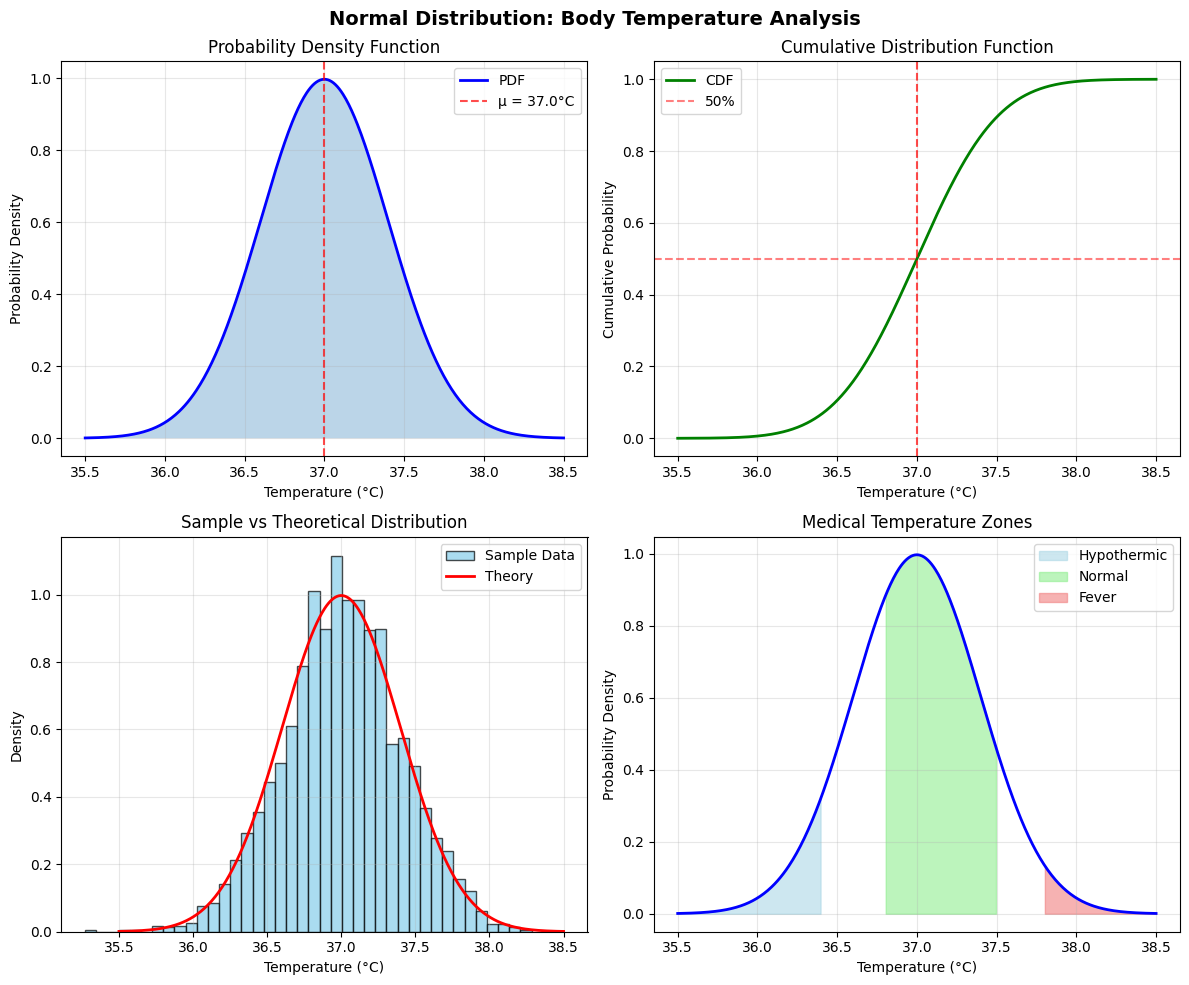


MEDICAL INTERPRETATION
• Hypothermic (≤36.4°C): 6.7% of population
• Normal range (36.8-37.5°C): 58.6% of population
• Fever (>37.8°C): 2.3% of population
• Sample statistics: Mean = 37.01°C, Std = 0.40°C

📊 Key Properties of Normal Distribution:
• Bell-shaped and symmetric around the mean
• 68% of data within ±1 standard deviation
• 95% of data within ±2 standard deviations
• Total area under curve = 1


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Normal Distribution Implementation (No Libraries)
def normal_pdf(x, mean, std):
    """Calculate PDF manually: f(x) = (1/(σ√(2π))) * e^(-1/2 * ((x-μ)/σ)²)"""
    coeff = 1 / (std * math.sqrt(2 * math.pi))
    exponent = -0.5 * ((x - mean) / std) ** 2
    return coeff * math.exp(exponent)

def normal_cdf(x, mean, std):
    """Calculate CDF using error function approximation"""
    z = (x - mean) / std
    # Simple error function approximation
    return 0.5 * (1 + math.erf(z / math.sqrt(2)))

# Real-world Example: Body Temperature of Healthy Adults
print("="*50)
print("NORMAL DISTRIBUTION - BODY TEMPERATURE")
print("="*50)

# Parameters: μ = 37.0°C, σ = 0.4°C
mean, std = 37.0, 0.4
print(f"Distribution: μ = {mean}°C, σ = {std}°C\n")

# Key Questions
print("PROBABILITY CALCULATIONS:")
print("-" * 25)

# 1. PDF at 37.2°C
pdf_37_2 = normal_pdf(37.2, mean, std)
print(f"1. PDF at 37.2°C: {pdf_37_2:.4f}")

# 2. P(X ≤ 36.4°C) - hypothermic
prob_hypo = normal_cdf(36.4, mean, std)
print(f"2. P(X ≤ 36.4°C): {prob_hypo:.4f} ({prob_hypo*100:.1f}%)")

# 3. P(36.8°C < X ≤ 37.5°C) - normal range
prob_normal = normal_cdf(37.5, mean, std) - normal_cdf(36.8, mean, std)
print(f"3. P(36.8 < X ≤ 37.5°C): {prob_normal:.4f} ({prob_normal*100:.1f}%)")

# 4. P(X > 37.8°C) - fever
prob_fever = 1 - normal_cdf(37.8, mean, std)
print(f"4. P(X > 37.8°C): {prob_fever:.4f} ({prob_fever*100:.1f}%)")

# Manual Formula Demonstration
print("\n" + "="*50)
print("MANUAL CALCULATION EXAMPLE")
print("="*50)
x = 37.2
print(f"PDF at x = {x}°C:")
print(f"Formula: f(x) = (1/(σ√(2π))) * e^(-1/2 * ((x-μ)/σ)²)")
print(f"f({x}) = (1/({std}√(2π))) * e^(-1/2 * (({x}-{mean})/{std})²)")

coeff = 1 / (std * math.sqrt(2 * math.pi))
z = (x - mean) / std
exp_part = math.exp(-0.5 * z**2)
result = coeff * exp_part

print(f"f({x}) = {coeff:.4f} * e^({-0.5 * z**2:.4f}) = {result:.4f}")

# Create Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Normal Distribution: Body Temperature Analysis', fontsize=14, fontweight='bold')

# Temperature range for plotting
temps = np.linspace(35.5, 38.5, 500)
pdf_vals = [normal_pdf(t, mean, std) for t in temps]
cdf_vals = [normal_cdf(t, mean, std) for t in temps]

# Plot 1: PDF
ax1.plot(temps, pdf_vals, 'b-', linewidth=2, label='PDF')
ax1.axvline(mean, color='red', linestyle='--', alpha=0.7, label=f'μ = {mean}°C')
ax1.fill_between(temps, pdf_vals, alpha=0.3)
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Probability Density')
ax1.set_title('Probability Density Function')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: CDF
ax2.plot(temps, cdf_vals, 'g-', linewidth=2, label='CDF')
ax2.axhline(0.5, color='red', linestyle='--', alpha=0.5, label='50%')
ax2.axvline(mean, color='red', linestyle='--', alpha=0.7)
ax2.set_xlabel('Temperature (°C)')
ax2.set_ylabel('Cumulative Probability')
ax2.set_title('Cumulative Distribution Function')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Plot 3: Sample vs Theory
# Generate sample data using numpy (for simplicity)
sample_data = np.random.normal(mean, std, 3000)
ax3.hist(sample_data, bins=40, density=True, alpha=0.7, color='skyblue',
         edgecolor='black', label='Sample Data')
ax3.plot(temps, pdf_vals, 'r-', linewidth=2, label='Theory')
ax3.set_xlabel('Temperature (°C)')
ax3.set_ylabel('Density')
ax3.set_title('Sample vs Theoretical Distribution')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Medical Zones
ax4.plot(temps, pdf_vals, 'b-', linewidth=2)

# Color different medical zones
hypo_temps = temps[temps <= 36.4]
hypo_pdf = [normal_pdf(t, mean, std) for t in hypo_temps]
ax4.fill_between(hypo_temps, hypo_pdf, alpha=0.6, color='lightblue', label='Hypothermic')

normal_temps = temps[(temps > 36.8) & (temps <= 37.5)]
normal_pdf_vals = [normal_pdf(t, mean, std) for t in normal_temps]
ax4.fill_between(normal_temps, normal_pdf_vals, alpha=0.6, color='lightgreen', label='Normal')

fever_temps = temps[temps > 37.8]
fever_pdf = [normal_pdf(t, mean, std) for t in fever_temps]
ax4.fill_between(fever_temps, fever_pdf, alpha=0.6, color='lightcoral', label='Fever')

ax4.set_xlabel('Temperature (°C)')
ax4.set_ylabel('Probability Density')
ax4.set_title('Medical Temperature Zones')
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()

# Summary
print("\n" + "="*50)
print("MEDICAL INTERPRETATION")
print("="*50)
print(f"• Hypothermic (≤36.4°C): {prob_hypo*100:.1f}% of population")
print(f"• Normal range (36.8-37.5°C): {prob_normal*100:.1f}% of population")
print(f"• Fever (>37.8°C): {prob_fever*100:.1f}% of population")
print(f"• Sample statistics: Mean = {np.mean(sample_data):.2f}°C, Std = {np.std(sample_data):.2f}°C")

print("\n📊 Key Properties of Normal Distribution:")
print("• Bell-shaped and symmetric around the mean")
print("• 68% of data within ±1 standard deviation")
print("• 95% of data within ±2 standard deviations")
print("• Total area under curve = 1")